full wage=[ 1.104783] 
full critical stage=[ 0.47565406] 
full low skill=[ 0.53714648] 
full learning intensity=[ 0.09308448]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


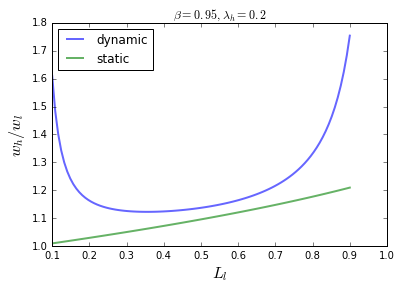

C:\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:164: RuntimeWarning: Tolerance of -1.8843269801e+25 reached
  warnings.warn(msg, RuntimeWarning)


RuntimeError: Failed to converge after 50 iterations, value is nan

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

"""
use beta=0.9, 0.97
lambdah=0.43, 0.45, 0.47
"""

beta=0.95
lambdah=0.2

def lnwage(low):
    temp1=(1-beta)/((1-low)*beta*(low+beta-1))
    temp2=(low+beta-1)/low
    return np.exp(temp1)*temp2
    
"""
high=1-low
llow=low+beta-1
"""
def stage(low):
    temp1=(low+beta-1)*np.exp(-lambdah)
    temp2=np.sqrt(temp1**2+(1-low)*(1-low+2*(low+beta-1)))
    temp3=(temp1+temp2)/(1-low+2*(low+beta-1))
    return -np.log(temp3)/lambdah

def wage(low):
    return (np.exp(2*lambdah*stage(low))+1)/2

def dwage(low):
    return lnwage(low)-wage(low)
full_low=fsolve(dwage, 0.3)
full_wage=wage(full_low)
full_stage=stage(full_low)
full_learn=(1-beta)/full_low
print("full wage={}".format(full_wage),"\n"
      "full critical stage={}".format(full_stage), "\n"
     "full low skill={}".format(full_low), "\n"
     "full learning intensity={}".format(full_learn))

fig, ax=plt.subplots()
Low=np.linspace(0.1, 0.9, 100)
W1=[]
W2=[]
for low in Low:
    w1=lnwage(low)
    w2=wage(low)
    W1.append(w1)
    W2.append(w2)
ax.plot(Low, W1, lw=2, alpha=0.6, label='dynamic')
ax.plot(Low, W2, lw=2, alpha=0.6, color='green', label='static')
t=r'$\beta={}, \lambda_h={}$'.format(beta, lambdah)
ax.set_title(t)
ax.set_xlabel(r"$L_l$", fontsize=16)
ax.set_ylabel(r"$w_h/w_l$", fontsize=16)
ax.legend(loc='best')
plt.show()


import scipy
from scipy.optimize import newton
from scipy.optimize import fixed_point
def g(w):
    def f(x):
        return lnwage(x)-w
    return (newton(f, 0.035), newton(f, 0.99))
def low(w):
    return (g(w)[0]+g(w)[1])/2
def newwage(w):
    return wage(low(w))
equi_wage=fixed_point(newwage, 1.2)
equi_lownorth, equi_lowsouth=g(equi_wage)
equi_stage=stage(low(equi_wage))
equi_learnsouth=(1-beta)/equi_lowsouth
equi_learnnorth=(1-beta)/equi_lownorth
print("global wage={}".format(equi_wage),"\n"
      "global critical stage={}".format(equi_stage), "\n"
     "north low skill={}".format(equi_lownorth), "\n"
      "north learning intensity={}".format(equi_learnnorth), "\n"
     "south low skill={}".format(equi_lowsouth), "\n"
     "south learning intensity={}".format(equi_learnsouth))

In [456]:
import scipy
from scipy.optimize import newton
from scipy.optimize import fixed_point
def g(w):
    def f(x):
        return lnwage(x)-w
    return (newton(f, 0.035), newton(f, 0.99))
def low(w):
    return (g(w)[0]+g(w)[1])/2
def newwage(w):
    return wage(low(w))
equi_wage=fixed_point(newwage, 1.2)
equi_lownorth, equi_lowsouth=g(equi_wage)
equi_stage=stage(low(equi_wage))
equi_learnsouth=(1-beta)/equi_lowsouth
equi_learnnorth=(1-beta)/equi_lownorth
print("global wage={}".format(equi_wage),"\n"
      "global critical stage={}".format(equi_stage), "\n"
     "north low skill={}".format(equi_lownorth), "\n"
      "north learning intensity={}".format(equi_learnnorth), "\n"
     "south low skill={}".format(equi_lowsouth), "\n"
     "south learning intensity={}".format(equi_learnsouth))

global wage=1.2063981471293619 
global critical stage=0.359969716549546 
north low skill=0.08303881474286097 
north learning intensity=0.36127683292323476 
south low skill=0.827264548742833 
south learning intensity=0.036264094775474244


In [494]:
def f(x):
    print (x**2)

In [495]:
f(3)

9
